
\\
$\large \textbf{Vehicle identification and prediction for self driving cars}$

\\
$\textbf{Under the guidance of  prof. Amit Sethi}$


In [ ]:
#necessary packages
import glob #to access files
import cv2 as cv2 #OpenCV for image processing
import numpy as np #vector array operations
import matplotlib.pyplot as plt #plots
import random #random number generator
from skimage.feature import hog #for Histogram of Gradient analysis
from zipfile import ZipFile as zip #Unzipping files as dataset is in zip file type

#Importing Datasets :
$\text{The dataset provided for the project is a combination of datasets from various sources.These sources are GTI vehicle image database (GTI),KITTI vision benchmark suite}$$\text{and extra images extracted from Udacity's project video.The sets of GTI Far, GTI left,GTI Right and GTI MiddleClose are from the same source of GTI with different}$$\text{viewpoints.Together with the KITTI examples they constitute the whole set of vehicle images.The images from udacity's project video are used as test images along with }$ $\text{some random images from net.}$

$\text{The datasets are open-sourced and open to use for analysis for all.}$

\\
$\text{Dataset credits :} $
1. $\text{GTI vehicle image database : }$ [http://www.gti.ssr.upm.es/data/Vehicle_database.html](https://) 

2. $\text{KUTTI vision bechmark suite : }$KUTTI :[http://www.cvlibs.net/datasets/kitti/](https://)

\\
$\text{direct link to access\download dataset , we have uploaded the data on G-drive for better access .: }$

1. $\text{car data :}$ https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip
2. $\text{non-car data :}$ https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

#Extracting zip files datasets 
car_data = zip('/content/drive/MyDrive/vehicles.zip' , 'r').extractall()
print("Succcesssfuly unzipped data from car_data" )
non_car_data = zip('/content/drive/MyDrive/non-vehicles.zip' , 'r').extractall()
print("Succcesssfuly unzipped data from non_car_data")

#Accessing content of datasets
vehicle_image = glob.glob('/content/vehicles/**/*.png', recursive=True) #obtain only image files
print("Successfully retrieved vehicle image data ! \nData details : Found {total} images".format(total = len(vehicle_image)))
non_vehicle_image = glob.glob('/content/non-vehicles/**/*.png', recursive=True) #obtain only image files
print("Successfully retrieved vehicle image data ! \nData details : Found {total} images".format(total = len(non_vehicle_image)))

Succcesssfuly unzipped data from car_data
Succcesssfuly unzipped data from non_car_data
Successfully retrieved vehicle image data ! 
Data details : Found 8792 images
Successfully retrieved vehicle image data ! 
Data details : Found 8968 images


$\text{Reference for zipfile module :}$ [https://docs.python.org/3/library/zipfile.html](https://) \\
$\text{Reference for glob module :}$ [https://docs.python.org/3/library/glob.html](https://)

#Reading dataset and visualizing data

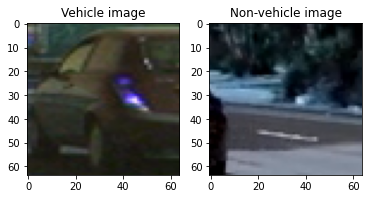

In [ ]:
#reading image data
vehicle_image = [] #store individual images of vehicles only
path = glob.glob('/content/vehicles/**/*.png', recursive=True)
for imgpath in path:
  car = cv2.imread(imgpath) #read files from path
  pic = cv2.cvtColor(car , cv2.COLOR_BGR2RGB) #convert to RGB #for visualizing only
  #plt.show()
  vehicle_image.append(pic) #append in list


non_vehicle_image = []
path1 = glob.glob('/content/non-vehicles/**/*.png', recursive=True)
for imgpath in path1 :
  car1 = cv2.imread(imgpath)
  pic = cv2.cvtColor(car1 , cv2.COLOR_BGR2RGB)
  non_vehicle_image.append(pic)

#loading last two images in datasets
fig , (ax1 , ax2)  = plt.subplots(1,2)
ax1.imshow(car)
ax1.set_title("Vehicle image")
ax2.imshow(car1)
ax2.set_title("Non-vehicle image")
plt.show()

$\text{Indicates pixel size of image as  64$\times$64 , and 3 channels / colors. }$

$\text{Reference for Hog and how to use it :}$ \\

[https://lilianweng.github.io/lil-log/2017/10/29/object-recognition-for-dummies-part-1.html](https://)

[https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html](https://)



In [ ]:
#Using hog module to get hog features
def Generate_hog_features(image, orientation ,cellsPerBlock,pixelsPerCell, visualize=True ) :
  #Forcing only certain input datatypes to be accepted

  assert type(orientation) and type(cellsPerBlock) and type(pixelsPerCell) is int
  assert type(visualize) is bool

  if (visualize==True) :
    hog_features, hog_image = hog(image , orientations = orientation, pixels_per_cell=(pixelsPerCell, pixelsPerCell),  cells_per_block=(cellsPerBlock, cellsPerBlock), visualize=True )
    return hog_features, hog_image
  
  else:
    hog_features = hog(image, orientations=orientation ,pixels_per_cell=(pixelsPerCell, pixelsPerCell), cells_per_block=(cellsPerBlock, cellsPerBlock), visualize=False )
    return hog_features

$\text{Color spaces plays a vital role in hog analysis , to check this effect ,the above hog features can be redrawn from optimum color space obtained.}$

$\text{Hog features of non-vehicle image are very distinctive in earlier color space but now it is some what became blurred.}$
$\text{Hence by choosing appropriate color space we can improve the quality of features.}$

In [ ]:
#extract hog features for all images 
def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell):
  featureList = [] #store features
  for image in images:
    image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV) #as this color specification gave highest accuracy during feature selection
    features_of_channel1 = Generate_hog_features(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False) #as hog can generate feature per column of image color. for more see :https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html
    features_of_channel2 = Generate_hog_features(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False)
    features_of_channel3 = Generate_hog_features(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False)
    feature = np.hstack((features_of_channel1 , features_of_channel2 ,features_of_channel3)) #as fetaures should appear column wise for an image stacking horizontally
    #print(feature.shape)
    featureList.append(feature) #generating features as an array list
  
  return featureList

$\text{Extracting hog features for image dataset at values which we obtained from feature selection step.}$

In [ ]:
orientations = 9
cellsPerBlock = 2
pixelsPerBlock = 8
vehicleFeatures = ExtractFeatures(vehicle_image,orientations,cellsPerBlock,pixelsPerBlock)
nonVehicleFeatures = ExtractFeatures(non_vehicle_image,orientations,cellsPerBlock,pixelsPerBlock)

$\text{As over dataset had separate vehicle and non-vehicle dataset , we can assign them labels.As only 2 classes are their we will assign binary values to label.}$

In [ ]:
#feature list will be list of all fetures stacked vertically
features = np.vstack([vehicleFeatures, nonVehicleFeatures])
print("Shape of features list is ", features.shape)

#label will be 1 for vehicle detected and 0 for non vehicle detected
assigned_labels= np.concatenate([np.ones(len(vehicleFeatures)), np.zeros(len(nonVehicleFeatures))])
print("Shape of label list is ", assigned_labels.shape)

Shape of features list is  (17760, 5292)
Shape of label list is  (17760,)


$\text{As we have a total of 17760 images , the rows generated are 17760 and for each image 5291 hog features are extracted by using Extractfeature function.}$ \\
$\text{For 17760 images we have labelled each vehicle image as 1 and non_vehicle image as 0.}$ \\
$\text{In this way our final data is ready for classification.}$

#Train-Test Split

$\text{We will be using 67% data as training data and rest is validation data.Also shuffling is done to avoid overfitting the data.}$

In [ ]:
X_train = features
Y_train = assigned_labels

In [ ]:
from sklearn.svm import SVC

In [ ]:
import timeit
start = timeit.default_timer()
classifier1 = SVC(C = 10 , kernel = 'rbf')
classifier1.fit(X_train,Y_train) 
end = timeit.default_timer()
print(end - start)

323.1564168389996


$\text{For our selected classifier framework of Support vector classifier with Hyperparameter as C=10 and kernel = rbf }$$\text{, we can see from confusion matrix that the true positive and true negative are way more than false positive or false negative ,}$ $\text{ Hence we can use this model framework for our test data prediction with some modifications to remove false positive.}$

#Sliding windows approach for prediction in a image

$\text{ X-axis is from 0 to 1280 and Y-axis is from 0 to 720 , we can select a window size which can cover the entire image area say (64,64) as it can divide 1280 and 720 both.}$

$\text{In below function we generate windows of different size which covers the entire image space.}$

In [ ]:
# function to draw sliding Windows
def Generate_windows(image, windows) :
  new_image = np.copy(image) #copy of image to produce desired boxes on it without affecting original image
  thick = np.random.randint(low = 3 , high = 6) #thickness of box drawn

  for window in windows :

    color = (np.random.randint(low = 0 , high = 255) , 0 , 0 ) #RGB color values #only R taken i.e. red windows generated
    #print(color)
  
    cv2.rectangle(new_image, window[0], window[1], color, thick) #    # Draw a rectangle given coordinates
    
    #image copy with boxes drawn
  return new_image

In [ ]:
# function to find the windows on which we are going to run the classifier
def sliding_window(img, x_axis=[0 , 1280], y_axis=[0 , 720], window_shape = (16, 16), xy_overlap = (0.8, 0.8)) :

  assert x_axis[0] != None and x_axis[1] != None 
  assert y_axis[0] != None and y_axis[1] != None 

  window_list = [] #small windowss generated which covers entire image with window size = window_shape and overlapping allowed is  = 20 %

  x = x_axis[1] - x_axis[0]
  y = y_axis[1] - y_axis[0]
     
  windows_x = np.int( 1 + (x - window_shape[0])/(window_shape[0] * xy_overlap[0]))
  windows_y = np.int( 1 + (y - window_shape[1])/(window_shape[1] * xy_overlap[1]))

  for i in range(0,windows_y) :
    y_start = y_axis[0] + np.int( i * window_shape[1] * xy_overlap[1])
    
    for j in range(0,windows_x) :

      x_start = x_axis[0] + np.int( j * window_shape[0] * xy_overlap[0])
      x1 = np.int( x_start +  window_shape[0])
      y1 = np.int( y_start + window_shape[1])
      window_list.append(((x_start,y_start),(x1,y1)))

  return window_list

$\text{Randomly sliding over image didn't work out too well then refered to below repository and modified their idea to suit our needs of sliding window.}$
$\text{Formula of sliding window credit :}$ [https://github.com/harveenchadha/Udacity-CarND-Vehicle-Detection-and-Tracking](https://) 

\\
$\text{modification done: fixed the size of x axis , where to start and stop as dimension obtained previously and updated the same for Y axis.}$

$\text{function to identify car in window , returned 1 if car detected by classifier.}$

In [ ]:
def Highlight_Car(image,windows) :

  car_in_window = [] #store window dimension if car detected

  for window in windows :

    start = window[0]
    end = window[1]

    new_img = image[start[1]:end[1], start[0]:end[0]] #only checking one window at a time

    if (new_img.shape[1] == new_img.shape[0] and new_img.shape[1] != 0) : #as we are clipping only some part chances are we wouldn't get the needed square bracket #hence enforcing square brackets and rejecting empty end to the image

      new_img = cv2.resize(new_img, (64,64))  # resizing can reduce features of image
      features = ExtractFeatures([new_img], 9 , 2 , 8)
      predict = classifier1.predict([features[0]])
        
      if (predict == 1) :
        car_in_window.append(window)
          
  return car_in_window

In [ ]:
# function to increase the pixel by one inside each box if heat(car) detected
# applied only on windows with prediction = 1
def add_heat(heatmap, window_list):
  for window in window_list:
    # Add += 1 for all pixels inside each window where car detected
    heatmap[window[0][1]:window[1][1], window[0][0]:window[1][0]] += 1
    # Return updated heatmap
  return heatmap
#applying threshold to reduce false positives
def eliminate_false_positive(heatmap, threshold):
  heatmap[heatmap <= threshold] = 0 #make samples detected zero in heatmap if value is less than threshold
  return heatmap #return only heatmaps with more than threshold values

In [ ]:
#Drawing windows with only detected car windows and having pixels more than threshold .
def label_car_window(img, labels):
  # Iterate through all detected cars
  for car_number in range(1, labels[1]+1):
    # Find pixels with each car_number label value
    nonzero = (labels[0] == car_number).nonzero() #returns indices of element when condition is met #doc : https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html
    # Identify x and y values of those pixels
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    #Define a bounding box using min and max values
    window = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
    # Draw the box on the image
    cv2.rectangle(img, window[0], window[1], (0,250,0), 5) #green colored just for fun
    # Return the image
  return img

In [ ]:
from scipy.ndimage import label

In [ ]:
import matplotlib.image as mpimg

In [ ]:
image = mpimg.imread('/content/drive/MyDrive/test_new_1.jpg')

In [ ]:
#defining the Parameters required for the pipeline to run from feature selection
orientation=9 # No of orientations of HOG
cellsPerBlock=2 # No of cells per block
pixelsPerCell=8 # No of pixels per cell
windows = []
for i in range(1,3,1) :
  windows += sliding_window(image, x_axis=[0, 1280], y_axis=[400,720],window_shape=(round(200/i),round(200/i)), xy_overlap=(0.20/i, 0.20/i))

## video

In [ ]:
# Defining a class to store the refined frames found from the last 15 frames
class KeepTrack():
  def __init__(self):
    self.refinedWindows = [] 
        
  def AddWindows(self, refinedWindow):
    self.refinedWindows.append(refinedWindow)
    frameHistory=20
    if len(self.refinedWindows) > frameHistory:
      self.refinedWindows = self.refinedWindows[len(self.refinedWindows)-frameHistory:]

In [ ]:
# Defining a pipeline for Video Frame Processing
# Note here the track of last 15 frames is kept
def video_pipeline(image):
  rand= random.randint(0,1)
  if (rand<0.4):
    refinedWindows=keepTrack.refinedWindows[:-1]
  else:
    refinedWindows=Highlight_Car(image,windows)
    if len(refinedWindows) > 0:
      keepTrack.AddWindows(refinedWindows)
            
  heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
  for refinedWindow in keepTrack.refinedWindows:
    heat = add_heat(heat, refinedWindow)
  heatmap = eliminate_false_positive(heat, 25 + len(keepTrack.refinedWindows)//2)
  labels = label(heatmap)
  draw_img = label_car_window(np.copy(image), labels)
  return draw_img

In [ ]:
keepTrack = KeepTrack()
import moviepy
from moviepy.editor import VideoFileClip
video_output1 = 'out_vid2.mp4'
video_input1 = VideoFileClip('/content/drive/MyDrive/test_video(1).mp4')
processed_video = video_input1.fl_image(video_pipeline)
%time 
processed_video.write_videofile(video_output1, audio=False)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
[MoviePy] >>>> Building video out_vid2.mp4
[MoviePy] Writing video out_vid2.mp4


 97%|█████████▋| 38/39 [19:44<00:31, 31.18s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out_vid2.mp4 



In [ ]:
video_input1.reader.close()
video_input1.audio.reader.close_proc()

Video pipeline credit:  [https://github.com/harveenchadha/Udacity-CarND-Vehicle-Detection-and-Tracking]